In [44]:
import pandas as pd
df = pd.read_csv('rc_tuning.csv')
df['file_path'] = df['file_path'].str.extract(r'\/([^\/]+)\.txt$')
df.head()

,file_path,alpha,beta,k,measurement,runtime,score
0,heur059_n_300_m_7867,0.2,0.6,15,1,0.422099,26273
1,heur059_n_300_m_7867,0.2,0.6,15,2,0.442144,27086
2,heur059_n_300_m_7867,0.2,0.6,15,3,0.415442,26254
3,heur059_n_300_m_7867,0.2,0.6,15,4,0.410567,26101
4,heur059_n_300_m_7867,0.2,0.6,15,5,0.407480,25304


In [45]:
average_scores = df.groupby(['file_path', 'alpha', 'beta', 'k'])['score'].mean().reset_index()
average_scores.head()


,file_path,alpha,beta,k,score
0,heur040_n_300_m_13358,0.2,0.6,15,40828.2
1,heur040_n_300_m_13358,0.2,0.6,30,39244.2
2,heur040_n_300_m_13358,0.2,0.6,45,39365.6
3,heur040_n_300_m_13358,0.2,0.6,60,39243.0
4,heur040_n_300_m_13358,0.2,0.8,15,40789.8


In [46]:
# Find the index of the row with the maximum average score for each 'file_path'
idx_max_avg_score = average_scores.groupby('file_path')['score'].idxmin()

# Extract the corresponding rows
best_combinations = average_scores.loc[idx_max_avg_score]
best_combinations

,file_path,alpha,beta,k,score
45,heur040_n_300_m_13358,0.8,1.0,30,22507.2
82,heur041_n_300_m_17492,0.4,1.0,45,30105.4
142,heur042_n_300_m_5764,0.4,1.0,45,4790.6
191,heur043_n_300_m_12914,0.2,1.0,60,30656.6
263,heur044_n_300_m_3234,0.4,1.0,60,7261.6
311,heur045_n_300_m_6293,0.2,1.0,60,16166.4
371,heur046_n_300_m_13150,0.2,1.0,60,35450.0
430,heur047_n_300_m_20096,0.2,1.0,45,50187.0
501,heur048_n_300_m_14666,0.4,1.0,30,40876.2
549,heur052_n_300_m_26628,0.2,1.0,30,58331.4


In [47]:
best_combinations['edge_number'] = best_combinations['file_path'].str.extract(r'(\d+)$').astype(int)

# Sort the DataFrame by the extracted number
sorted_df = best_combinations.sort_values(by='edge_number').drop(columns=['edge_number'])
sorted_df

,file_path,alpha,beta,k,score
843,heur057_n_300_m_2109,0.2,0.6,60,5733.6
719,heur054_n_300_m_2746,1.0,1.0,60,3834.0
263,heur044_n_300_m_3234,0.4,1.0,60,7261.6
911,heur058_n_300_m_4010,0.2,1.0,60,10147.4
731,heur055_n_300_m_5164,0.2,1.0,60,7928.2
142,heur042_n_300_m_5764,0.4,1.0,45,4790.6
311,heur045_n_300_m_6293,0.2,1.0,60,16166.4
971,heur059_n_300_m_7867,0.2,1.0,60,20555.0
803,heur056_n_300_m_12131,0.4,1.0,60,26041.0
1043,heur060_n_300_m_12405,0.4,1.0,60,33251.8


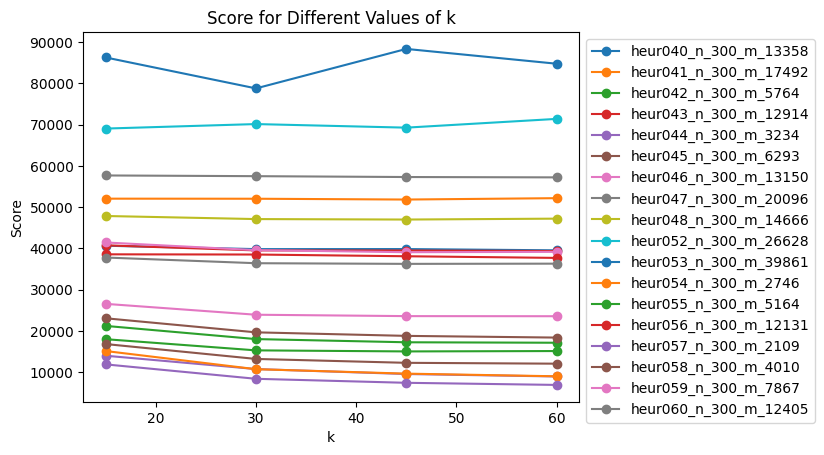

In [48]:
# Some plots
import matplotlib.pyplot as plt
average_scores = df.groupby(['file_path', 'alpha', 'beta', 'k'])['score'].mean().reset_index()
filtered_df = average_scores[(average_scores['alpha'] == 0.8) & (average_scores['beta'] == 0.8)]

file_paths = filtered_df['file_path'].unique()

for file_path in file_paths:
    file_path_data = filtered_df[filtered_df['file_path'] == file_path]
    plt.plot(file_path_data['k'], file_path_data['score'], label=file_path, marker = 'o')

plt.xlabel('k')
plt.ylabel('Score')
plt.title('Score for Different Values of k')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')  # Adjust the values for your desired position
plt.show()

# 2nd run

In [49]:
import pandas as pd
df = pd.read_csv('rc_tuning2.csv')
df['file_path'] = df['file_path'].str.extract(r'\/([^\/]+)\.txt$')
# Find the index of the row with the maximum average score for each 'file_path'
idx_min_avg_score = df.groupby('file_path')['score'].idxmin()

# Extract the corresponding rows
best_combinations = df.loc[idx_min_avg_score]
best_combinations['edge_number'] = best_combinations['file_path'].str.extract(r'(\d+)$').astype(int)

# Sort the DataFrame by the extracted number
sorted_df = best_combinations.sort_values(by='edge_number').drop(columns=['edge_number'])
sorted_df


,file_path,alpha,beta,k,measurement,runtime,score
567,heur057_n_300_m_2109,1.0,0.6,30,1,0.379413,6614
71,heur054_n_300_m_2746,1.0,1.0,30,1,0.374392,7140
435,heur044_n_300_m_3234,0.6,0.6,30,1,0.403983,8226
423,heur058_n_300_m_4010,1.0,0.6,30,1,0.397267,10568
347,heur055_n_300_m_5164,0.8,1.0,30,1,0.329755,8901
599,heur042_n_300_m_5764,0.8,1.0,30,1,0.406593,6472
303,heur045_n_300_m_6293,0.8,0.6,30,1,0.548775,17212
11,heur059_n_300_m_7867,0.6,1.0,30,1,0.330653,22031
513,heur056_n_300_m_12131,0.6,1.0,6,1,1.373619,25221
263,heur060_n_300_m_12405,0.6,1.0,30,1,0.345055,33561


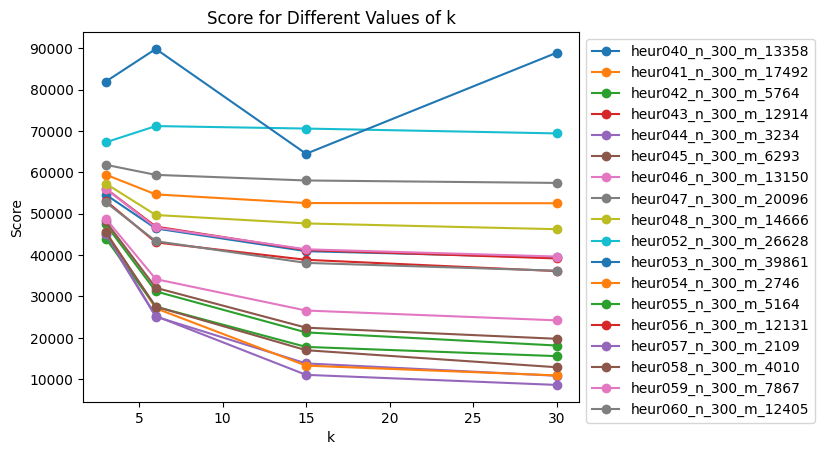

In [57]:
# Some plots
import matplotlib.pyplot as plt
average_scores = df.groupby(['file_path', 'alpha', 'beta', 'k'])['score'].mean().reset_index()
filtered_df = average_scores[(average_scores['alpha'] == 0.8) & (average_scores['beta'] == 0.8)]

file_paths = filtered_df['file_path'].unique()

for file_path in file_paths:
    file_path_data = filtered_df[filtered_df['file_path'] == file_path]
    plt.plot(file_path_data['k'], file_path_data['score'], label=file_path, marker = 'o')

plt.xlabel('k')
plt.ylabel('Score')
plt.title('Score for Different Values of k')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')  # Adjust the values for your desired position
plt.show()

/var/folders/tv/ysw0jsvs2t331mtk7hdh35kc0000gn/T/ipykernel_951/2485455041.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['num_edges'] = filtered_df['file_path'].str.extract(r'(\d+)$').astype(int)


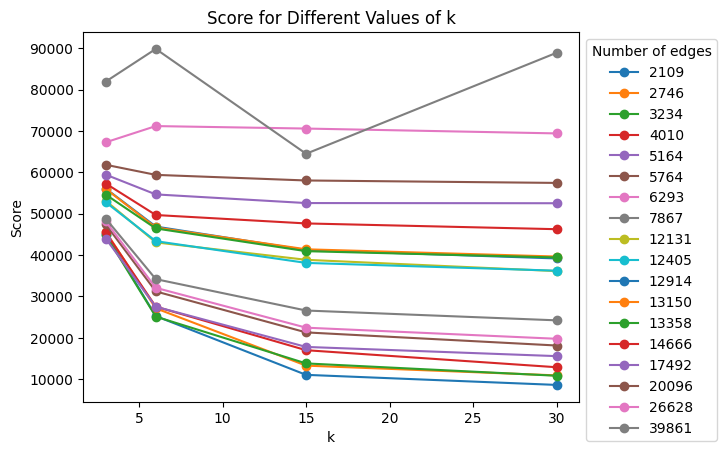

In [58]:
# Some plots
import matplotlib.pyplot as plt
average_scores = df.groupby(['file_path', 'alpha', 'beta', 'k'])['score'].mean().reset_index()
filtered_df = average_scores[(average_scores['alpha'] == 0.8) & (average_scores['beta'] == 0.8)]
filtered_df['num_edges'] = filtered_df['file_path'].str.extract(r'(\d+)$').astype(int)
filtered_df = filtered_df.sort_values(by='num_edges')

file_paths = filtered_df['file_path'].unique()

for file_path in file_paths:
    file_path_data = filtered_df[filtered_df['file_path'] == file_path]
    plt.plot(file_path_data['k'], file_path_data['score'], label=str(file_path_data['num_edges'].iloc[0]), marker='o')

plt.xlabel('k')
plt.ylabel('Score')
plt.title('Score for Different Values of k')
plt.legend(title='Number of edges', bbox_to_anchor=(1, 1), loc='upper left', ncol=1)  # Adjust the values for your desired position
plt.show()